In [1]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from prophet import Prophet


### TASK : Demand Forecasting
Prepare Time Series Data:
Ensure the data is in a time series format, with appropriate date indexing.


Select and Train Forecasting Model:
Choose a time series forecasting model (e.g., ARIMA, Prophet) and train it on historical data.


Validate Forecasts:
Evaluate the model’s accuracy using metrics such as Mean Absolute Error (MAE) and Mean Squared Error (MSE).
Generate and plot forecasts.


In [3]:
data = pd.read_csv(r"C:\\Users\\Asus\\Downloads\\Monu_final_df.csv", index_col='Unnamed: 0')

In [4]:
data.head()

,ActivitySiteID,BookingEndDateTime (Month / Day / Year),Number Booked,Price (INR),BookingEndDateTime
0,1,2018-04-08,12,499.0,2018-04-08
1,1,2018-04-15,15,499.0,2018-04-15
2,1,2018-04-22,14,499.0,2018-04-22
3,1,2018-04-29,9,499.0,2018-04-29
4,1,2018-05-06,7,499.0,2018-05-06


In [5]:
data['BookingEndDateTime'] = pd.to_datetime(data['BookingEndDateTime'])

In [6]:
data.tail()

,ActivitySiteID,BookingEndDateTime (Month / Day / Year),Number Booked,Price (INR),BookingEndDateTime
1107,4,2018-06-18,9,1299.0,2018-06-18
1108,4,2018-06-25,9,1299.0,2018-06-25
1109,4,2018-06-07,16,1299.0,2018-06-07
1110,4,2018-06-14,13,1299.0,2018-06-14
1111,4,2018-06-21,12,1299.0,2018-06-21


In [7]:
# Prepare the data for Prophet
prophet_data = data[['BookingEndDateTime', 'Number Booked']].reset_index()

In [8]:
prophet_data.drop(['index'], axis=1, inplace=True)

In [9]:
prophet_data.columns = ['ds', 'y']

In [10]:
prophet_data.head()

,ds,y
0,2018-04-08,12
1,2018-04-15,15
2,2018-04-22,14
3,2018-04-29,9
4,2018-05-06,7


In [11]:
# Initialize and train the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

21:42:52 - cmdstanpy - INFO - Chain [1] start processing
21:42:54 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# Forecast for the next 30 periods
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


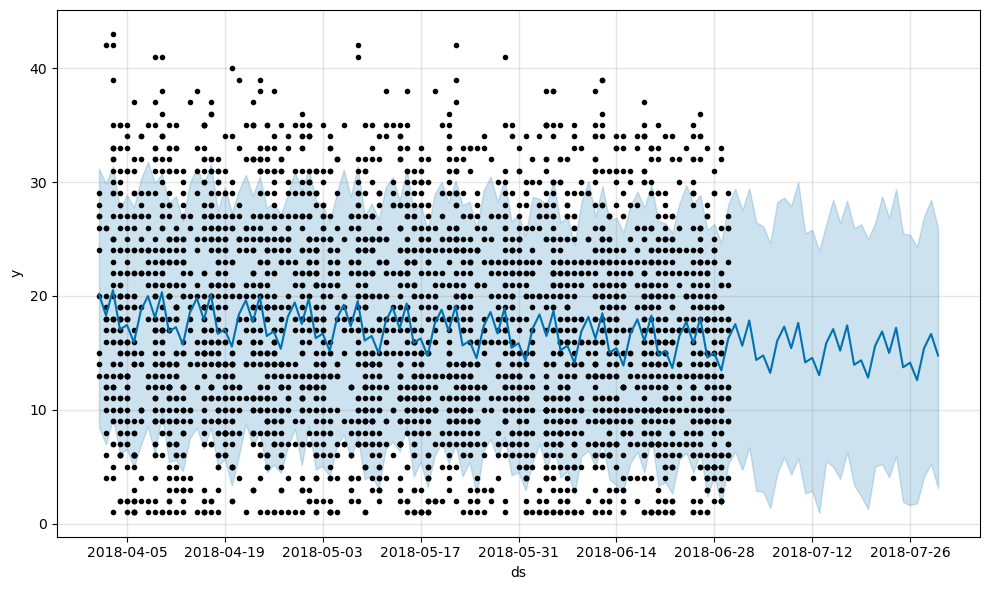

In [13]:
# Plot the forecast
fig = prophet_model.plot(forecast)
plt.show()


In [14]:
# Calculate MAE and MSE for validation
train_size = int(len(prophet_data) * 0.8)
train, test = prophet_data[:train_size], prophet_data[train_size:]

In [15]:
# Fit the model on the training data
prophet_model = Prophet()
prophet_model.fit(train)


21:42:54 - cmdstanpy - INFO - Chain [1] start processing
21:42:54 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Predict on the test data
test_forecast = prophet_model.predict(test[['ds']])
mae = mean_absolute_error(test['y'], test_forecast['yhat'])
mse = mean_squared_error(test['y'], test_forecast['yhat'])

print("Prophet MAE:", mae)
print("Prophet MSE:", mse)
print("Prophet RMSE:", np.sqrt(mse))


Prophet MAE: 7.5460404591937555
Prophet MSE: 81.27251062163302
Prophet RMSE: 9.01512676680883
